In [90]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D
from tensorflow.python.keras.layers import Activation, Dropout, Flatten, Dense
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.python.keras.applications import VGG16
from tensorflow.python.keras.optimizers import Adam
from keras.utils import to_categorical
from tensorflow.python import keras
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas
import cv2

In [69]:
classes = ['круассан','полки','пончик','завиток']

In [77]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               1179904   
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 771       
_________________________________________________________________
activation_3 (Activation)    (None, 3)                

In [78]:
model = keras.models.load_model('4classbigpic.h5')

In [41]:
# создаем csv-файл со списком тестовых картинок и отображаем результаты теста по каждой
spisoktest = pandas.read_csv("./test.csv")
for k in range(len(spisoktest)):
    print(spisoktest.iloc[k,0])
    im = spisoktest.iloc[k,0]
    img = image.load_img(im, target_size=(img_width, img_height))
    # Преобразуем картинку в массив
    x = image.img_to_array(img)
    x = x.reshape(1, x.shape[0],x.shape[1],x.shape[2])
    # Нормализуем изображение
    x /= 255
    prediction = model.predict(x)
    prediction = np.argmax(prediction)
    #print("Номер класса:", prediction)
    #print("Название класса:", classes[prediction])

/home/entilza/Chris/NN/test/cruassan/cruassan.63.jpg
/home/entilza/Chris/NN/test/cruassan/cruassan.64.jpg
/home/entilza/Chris/NN/test/cruassan/cruassan.65.jpg
/home/entilza/Chris/NN/test/cruassan/cruassan.66.jpg
/home/entilza/Chris/NN/test/cruassan/cruassan.67.jpg
/home/entilza/Chris/NN/test/cruassan/cruassan.68.jpg
/home/entilza/Chris/NN/test/cruassan/cruassan.69.jpg
/home/entilza/Chris/NN/test/polki/polki.63.jpg
/home/entilza/Chris/NN/test/polki/polki.64.jpg
/home/entilza/Chris/NN/test/polki/polki.65.jpg
/home/entilza/Chris/NN/test/polki/polki.66.jpg
/home/entilza/Chris/NN/test/polki/polki.67.jpg
/home/entilza/Chris/NN/test/polki/polki.68.jpg
/home/entilza/Chris/NN/test/polki/polki.69.jpg
/home/entilza/Chris/NN/test/ponchik/ponchik.63.jpg
/home/entilza/Chris/NN/test/ponchik/ponchik.64.jpg
/home/entilza/Chris/NN/test/ponchik/ponchik.65.jpg
/home/entilza/Chris/NN/test/ponchik/ponchik.66.jpg
/home/entilza/Chris/NN/test/ponchik/ponchik.67.jpg
/home/entilza/Chris/NN/test/ponchik/ponchik.6

In [80]:
#ПРОВЕРКА НА ОДНОЙ КАРТИНКЕ
imgM = image.load_img('zav.png', target_size=(100, 100))
#imgM = cv2.imread('download.png')
#imgM = cv2.cvtColor(imgM, cv2.COLOR_BGR2RGB)
# Нормализуем изображение
plt.imshow(imgM)
plt.show()

x = image.img_to_array(imgM)
x = np.expand_dims(x, axis=0)
#x = preprocess_input(x)

#img /= 255
prediction = model.predict(x)
#prediction.shape
prediction = np.argmax(prediction)
print("Номер класса:", prediction)
print("Название класса:", classes[prediction])

print(imgM.shape)
if prediction == 0:
    imgM[:,:,0] = imgM[:,:,0]*100
if prediction == 2:
    imgM[:,:,1] = imgM[:,:,1]+50
if prediction == 3:
    imgM[:,:,2] = imgM[:,:,2]*100
imgM[imgM>255] = 255
plt.imshow(imgM)
plt.show()

Номер класса: 2
Название класса: пончик


AttributeError: 'Image' object has no attribute 'shape'

In [44]:
imgM = cv2.imread('./pictest/Screenshot from magnitPonchik.png')
imgM = cv2.cvtColor(imgM, cv2.COLOR_BGR2RGB)
#imgM = image.load_img('./pictest/Screenshot from magnitPonchik.png')
print(imgM.shape)

(1136, 1878, 3)


In [45]:
listX = [0]
dw = 100
w=0
while w < imgM.shape[1]:
    w+=dw
    if w>imgM.shape[1]:
        w=imgM.shape[1]
    listX.append(w)
print(listX)

listY = [0]
dh = 100
h=0
while h < imgM.shape[0]:
    h+=dh
    if h>imgM.shape[0]:
        h=imgM.shape[0]
    listY.append(h)
print(listY) 

[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1878]
[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1136]


In [46]:
maskShape = (img_height, img_width, 3)
if len(imgM)==2:
    maskShape = (img_height, img_width)
mask = np.zeros(maskShape, dtype = np.uint8)

Номер класса: 0
Название класса: круассан


Номер класса: 0
Название класса: круассан


Номер класса: 0
Название класса: круассан


Номер класса: 0
Название класса: круассан


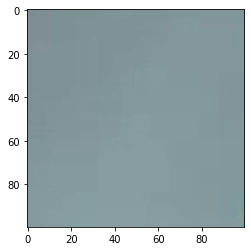

Номер класса: 1
Название класса: полки


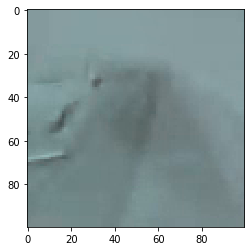

Номер класса: 1
Название класса: полки


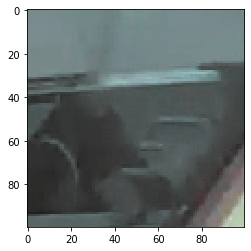

Номер класса: 1
Название класса: полки


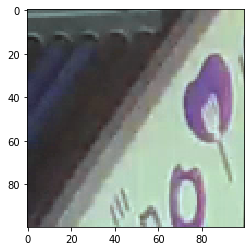

Номер класса: 0
Название класса: круассан


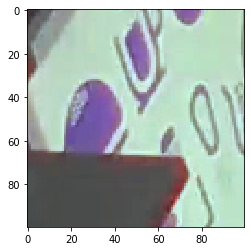

Номер класса: 1
Название класса: полки


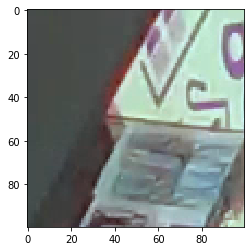

Номер класса: 1
Название класса: полки


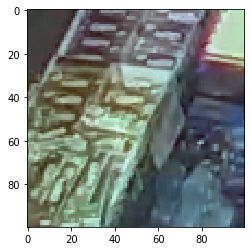

Номер класса: 1
Название класса: полки


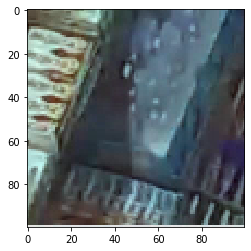

Номер класса: 1
Название класса: полки


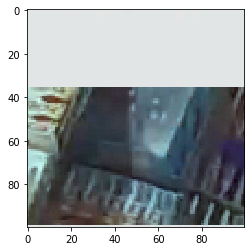

Номер класса: 0
Название класса: круассан


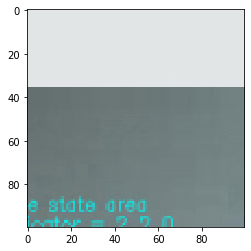

Номер класса: 1
Название класса: полки


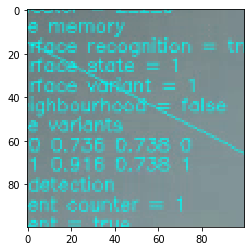

Номер класса: 0
Название класса: круассан


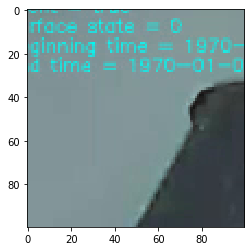

Номер класса: 1
Название класса: полки


Номер класса: 1
Название класса: полки


Номер класса: 1
Название класса: полки


Номер класса: 1
Название класса: полки


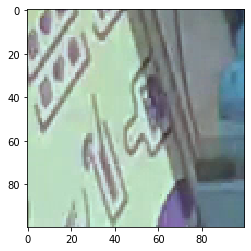

Номер класса: 0
Название класса: круассан


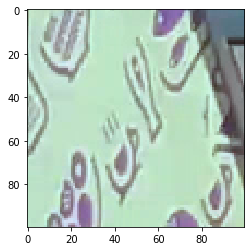

Номер класса: 1
Название класса: полки


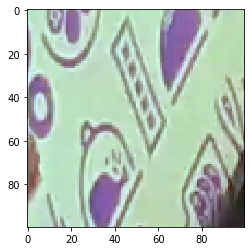

Номер класса: 1
Название класса: полки


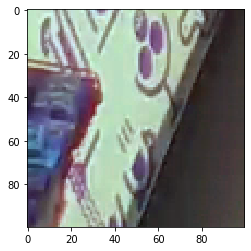

Номер класса: 1
Название класса: полки


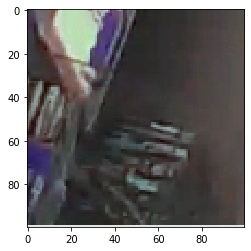

Номер класса: 1
Название класса: полки


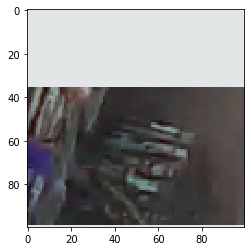

Номер класса: 0
Название класса: круассан


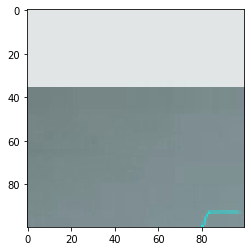

Номер класса: 1
Название класса: полки


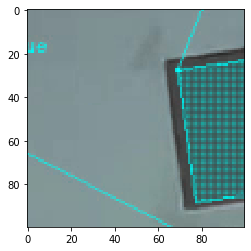

Номер класса: 1
Название класса: полки


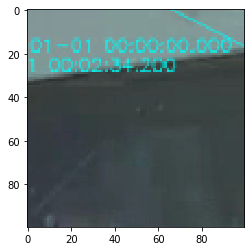

Номер класса: 1
Название класса: полки


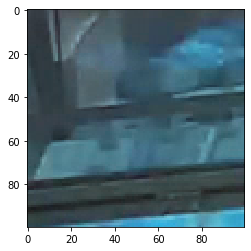

Номер класса: 3
Название класса: завиток


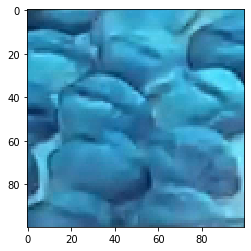

Номер класса: 0
Название класса: круассан


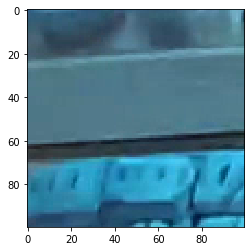

Номер класса: 1
Название класса: полки


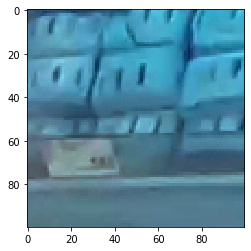

Номер класса: 1
Название класса: полки


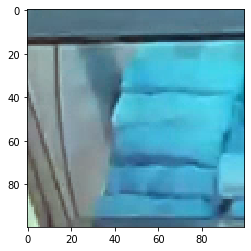

Номер класса: 0
Название класса: круассан


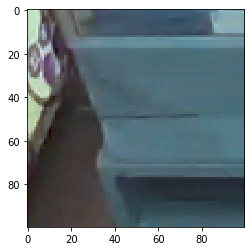

Номер класса: 1
Название класса: полки


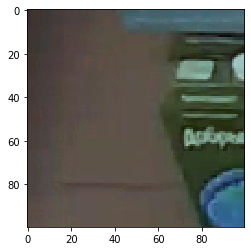

Номер класса: 0
Название класса: круассан


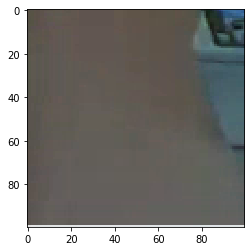

Номер класса: 0
Название класса: круассан


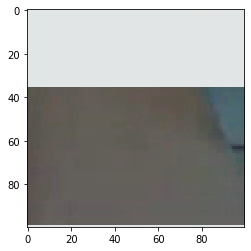

Номер класса: 0
Название класса: круассан


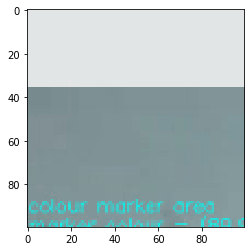

Номер класса: 1
Название класса: полки


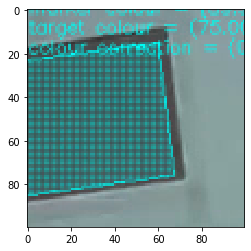

Номер класса: 1
Название класса: полки


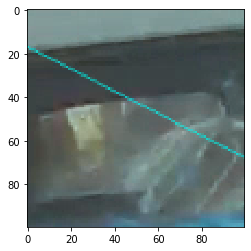

Номер класса: 1
Название класса: полки


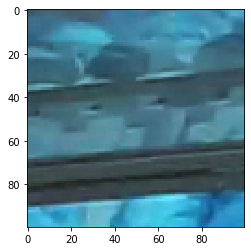

Номер класса: 0
Название класса: круассан


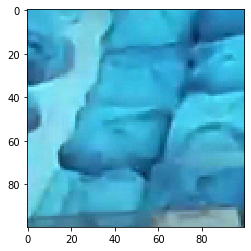

Номер класса: 1
Название класса: полки


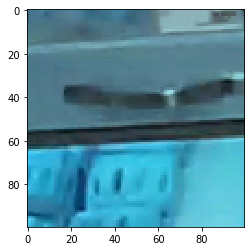

Номер класса: 1
Название класса: полки


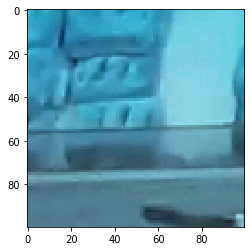

Номер класса: 1
Название класса: полки


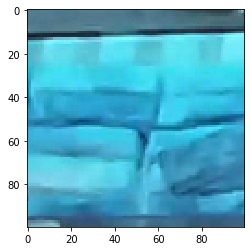

Номер класса: 1
Название класса: полки


Номер класса: 1
Название класса: полки


Номер класса: 1
Название класса: полки


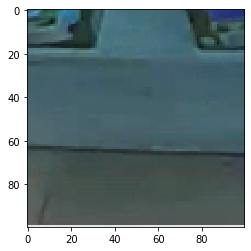

Номер класса: 0
Название класса: круассан


Номер класса: 0
Название класса: круассан


Номер класса: 0
Название класса: круассан


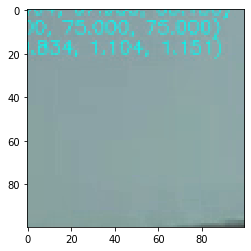

Номер класса: 1
Название класса: полки


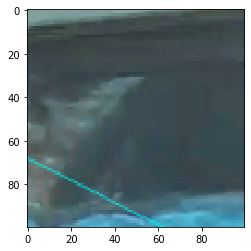

Номер класса: 1
Название класса: полки


Номер класса: 1
Название класса: полки


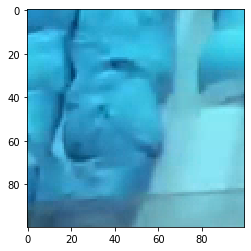

Номер класса: 1
Название класса: полки


Номер класса: 1
Название класса: полки


Номер класса: 1
Название класса: полки


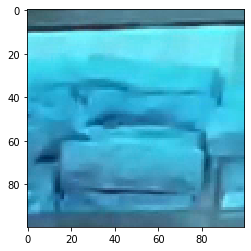

Номер класса: 1
Название класса: полки


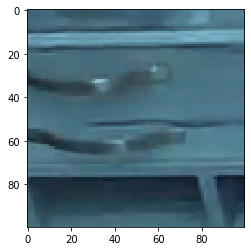

Номер класса: 1
Название класса: полки


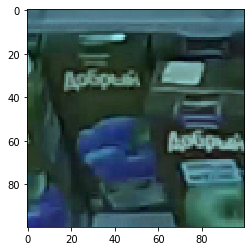

Номер класса: 1
Название класса: полки


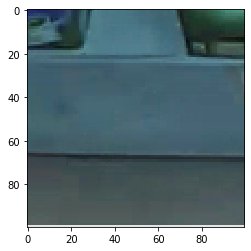

Номер класса: 0
Название класса: круассан


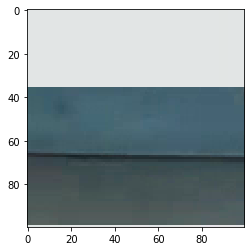

Номер класса: 0
Название класса: круассан


Номер класса: 0
Название класса: круассан


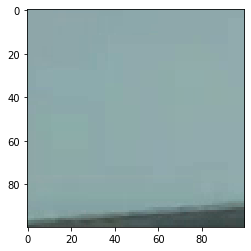

Номер класса: 1
Название класса: полки


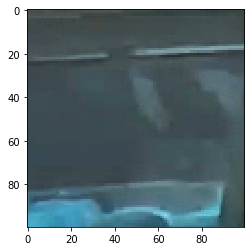

Номер класса: 1
Название класса: полки


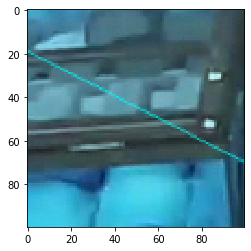

Номер класса: 0
Название класса: круассан


Номер класса: 1
Название класса: полки


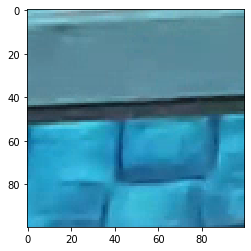

Номер класса: 1
Название класса: полки


Номер класса: 1
Название класса: полки


Номер класса: 1
Название класса: полки


Номер класса: 1
Название класса: полки


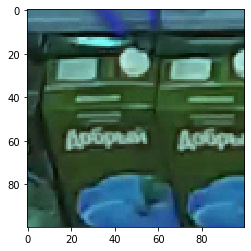

Номер класса: 1
Название класса: полки


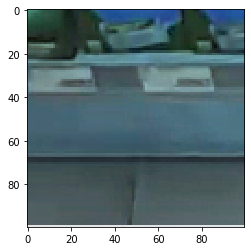

Номер класса: 0
Название класса: круассан


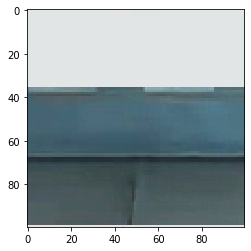

Номер класса: 0
Название класса: круассан


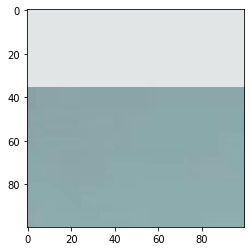

Номер класса: 0
Название класса: круассан


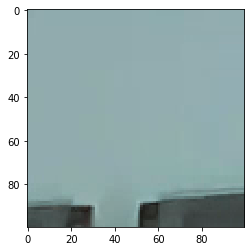

Номер класса: 1
Название класса: полки


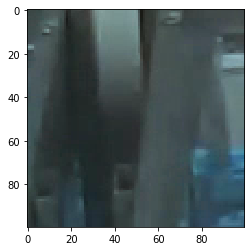

Номер класса: 1
Название класса: полки


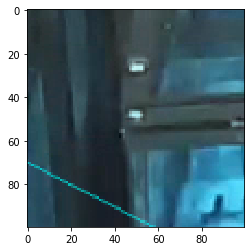

Номер класса: 1
Название класса: полки


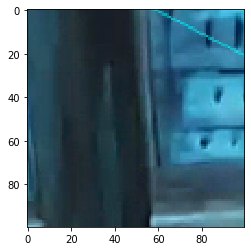

Номер класса: 1
Название класса: полки


Номер класса: 1
Название класса: полки


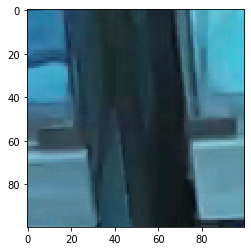

Номер класса: 1
Название класса: полки


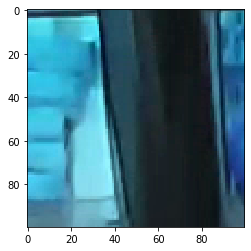

Номер класса: 1
Название класса: полки


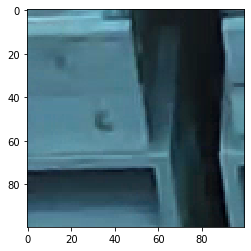

Номер класса: 1
Название класса: полки


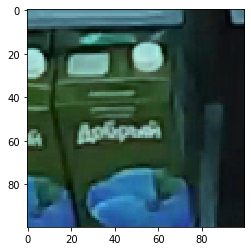

Номер класса: 1
Название класса: полки


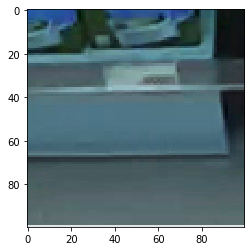

Номер класса: 0
Название класса: круассан


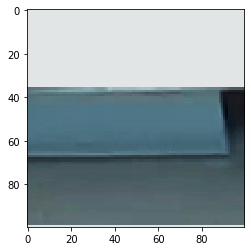

Номер класса: 0
Название класса: круассан


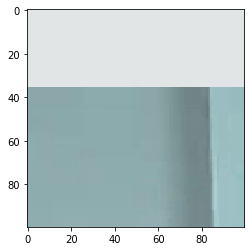

Номер класса: 0
Название класса: круассан


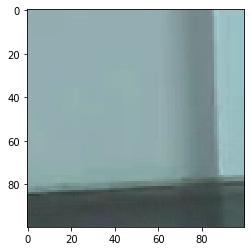

Номер класса: 1
Название класса: полки


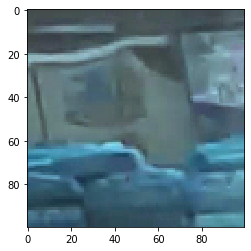

Номер класса: 1
Название класса: полки


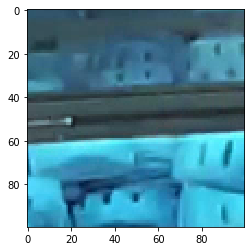

Номер класса: 1
Название класса: полки


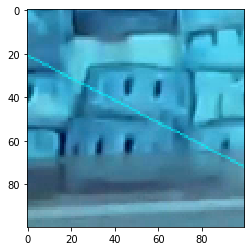

Номер класса: 0
Название класса: круассан


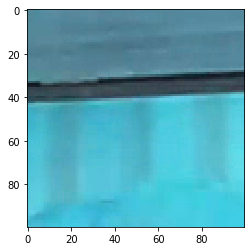

Номер класса: 1
Название класса: полки


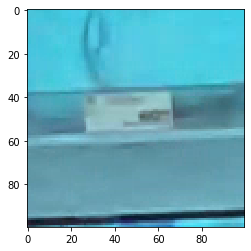

Номер класса: 2
Название класса: пончик


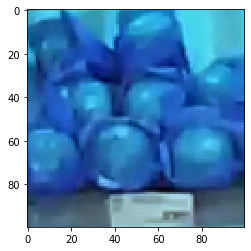

Номер класса: 1
Название класса: полки


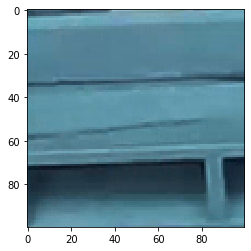

Номер класса: 3
Название класса: завиток


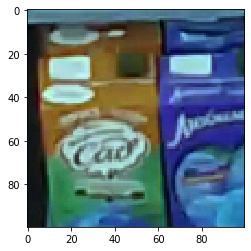

Номер класса: 1
Название класса: полки


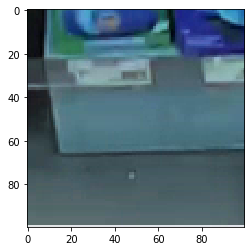

Номер класса: 0
Название класса: круассан


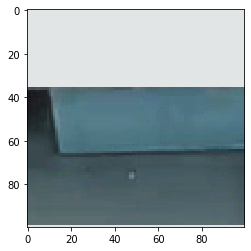

Номер класса: 0
Название класса: круассан


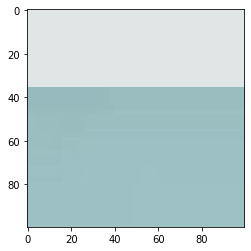

Номер класса: 0
Название класса: круассан


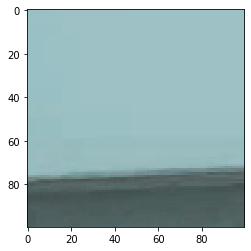

Номер класса: 3
Название класса: завиток


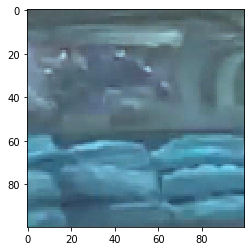

Номер класса: 1
Название класса: полки


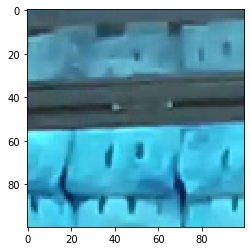

Номер класса: 1
Название класса: полки


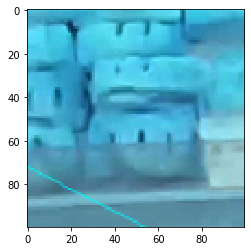

Номер класса: 0
Название класса: круассан


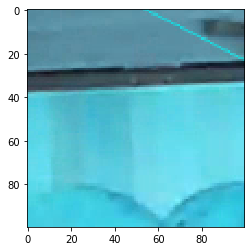

Номер класса: 1
Название класса: полки


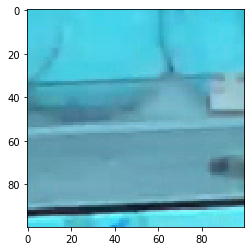

Номер класса: 0
Название класса: круассан


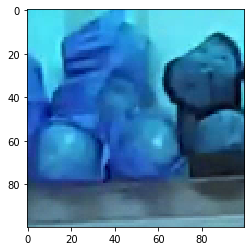

Номер класса: 1
Название класса: полки


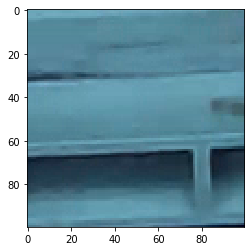

Номер класса: 1
Название класса: полки


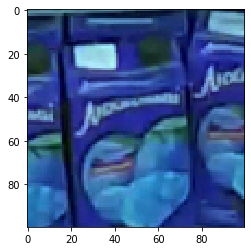

Номер класса: 1
Название класса: полки


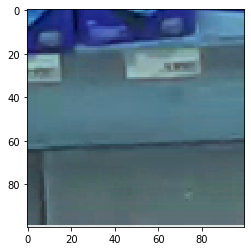

Номер класса: 0
Название класса: круассан


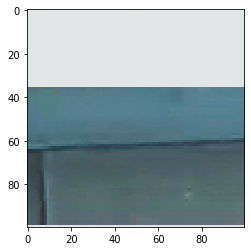

Номер класса: 0
Название класса: круассан


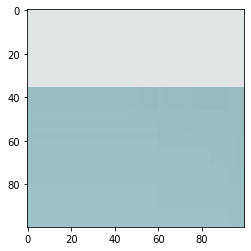

Номер класса: 0
Название класса: круассан


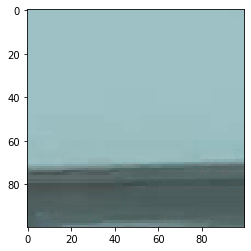

Номер класса: 1
Название класса: полки


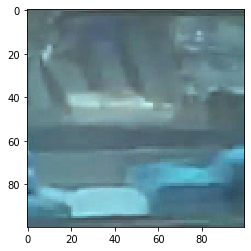

Номер класса: 1
Название класса: полки


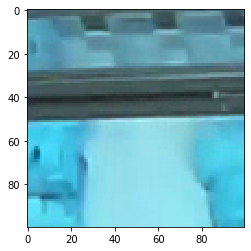

Номер класса: 1
Название класса: полки


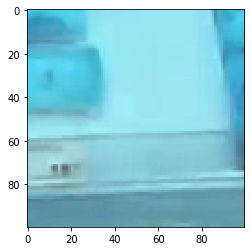

Номер класса: 1
Название класса: полки


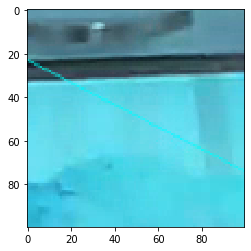

Номер класса: 1
Название класса: полки


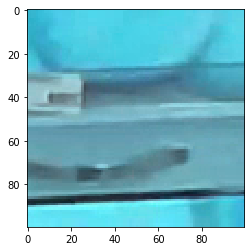

Номер класса: 0
Название класса: круассан


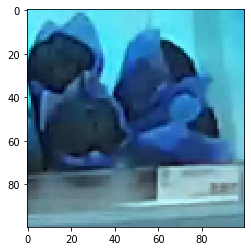

Номер класса: 1
Название класса: полки


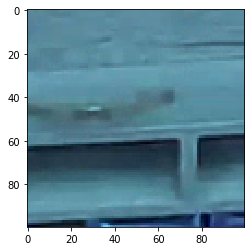

Номер класса: 1
Название класса: полки


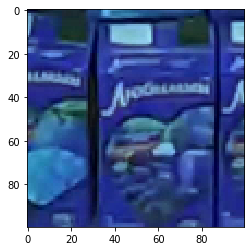

Номер класса: 1
Название класса: полки


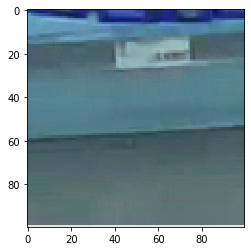

Номер класса: 0
Название класса: круассан


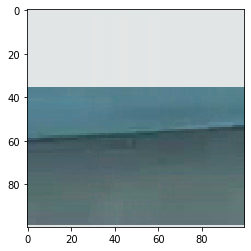

Номер класса: 0
Название класса: круассан


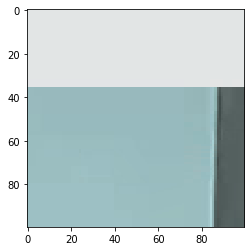

Номер класса: 0
Название класса: круассан


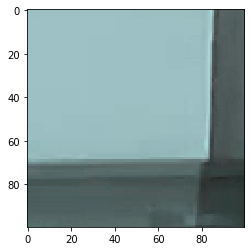

Номер класса: 0
Название класса: круассан


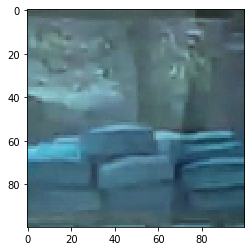

Номер класса: 1
Название класса: полки


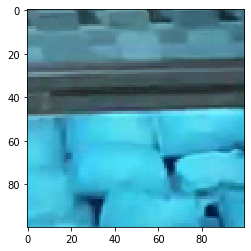

Номер класса: 1
Название класса: полки


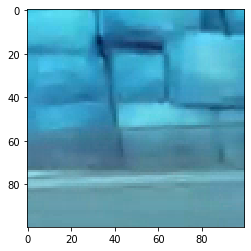

Номер класса: 0
Название класса: круассан


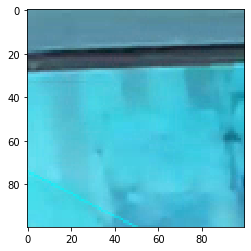

Номер класса: 1
Название класса: полки


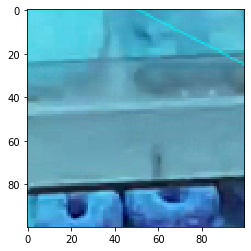

Номер класса: 2
Название класса: пончик


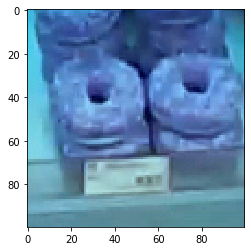

Номер класса: 1
Название класса: полки


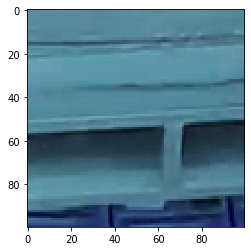

Номер класса: 1
Название класса: полки


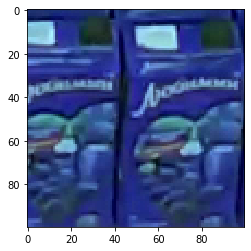

Номер класса: 1
Название класса: полки


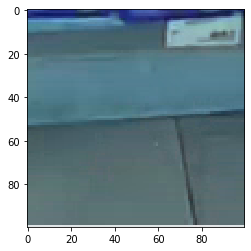

Номер класса: 1
Название класса: полки


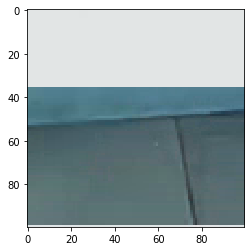

Номер класса: 0
Название класса: круассан


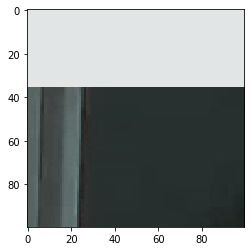

Номер класса: 1
Название класса: полки


Номер класса: 1
Название класса: полки


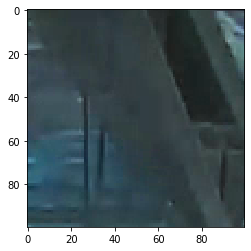

Номер класса: 1
Название класса: полки


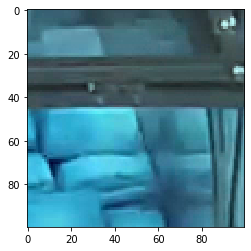

Номер класса: 1
Название класса: полки


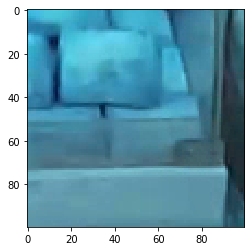

Номер класса: 0
Название класса: круассан


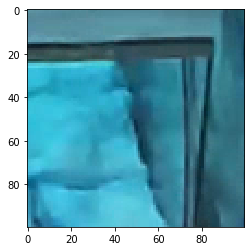

Номер класса: 1
Название класса: полки


Номер класса: 1
Название класса: полки


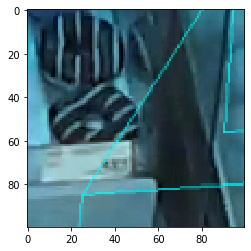

Номер класса: 1
Название класса: полки


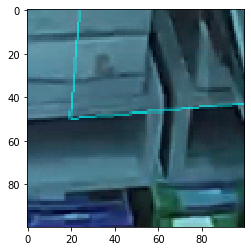

Номер класса: 1
Название класса: полки


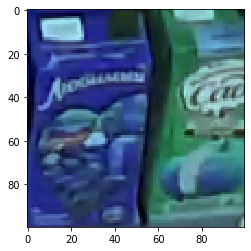

Номер класса: 1
Название класса: полки


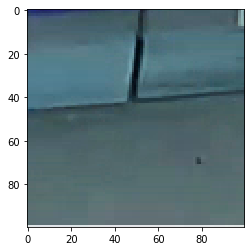

Номер класса: 1
Название класса: полки


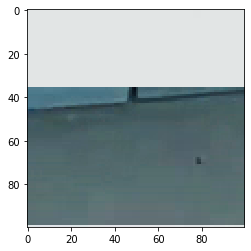

Номер класса: 1
Название класса: полки


Номер класса: 1
Название класса: полки


Номер класса: 1
Название класса: полки


Номер класса: 1
Название класса: полки


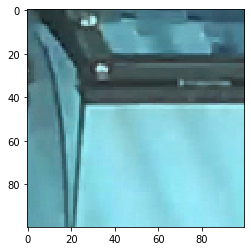

Номер класса: 1
Название класса: полки


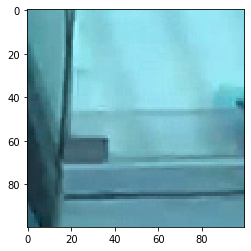

Номер класса: 3
Название класса: завиток


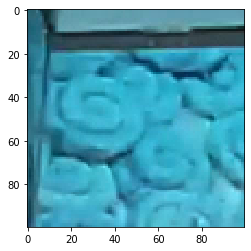

Номер класса: 1
Название класса: полки


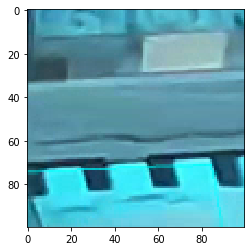

Номер класса: 1
Название класса: полки


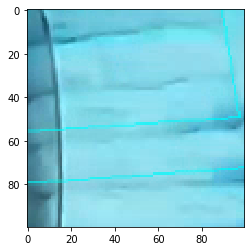

Номер класса: 1
Название класса: полки


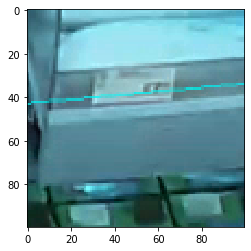

Номер класса: 1
Название класса: полки


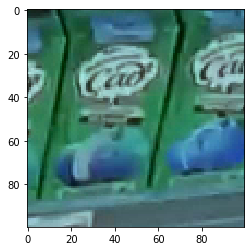

Номер класса: 1
Название класса: полки


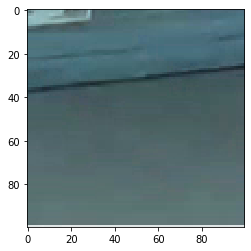

Номер класса: 0
Название класса: круассан


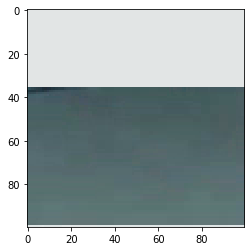

Номер класса: 1
Название класса: полки


Номер класса: 0
Название класса: круассан


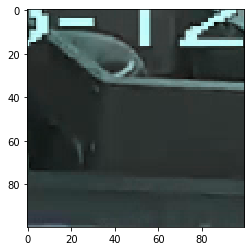

Номер класса: 1
Название класса: полки


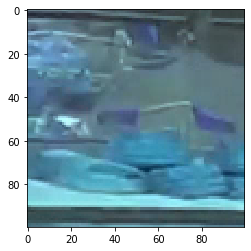

Номер класса: 1
Название класса: полки


Номер класса: 1
Название класса: полки


Номер класса: 3
Название класса: завиток


Номер класса: 1
Название класса: полки


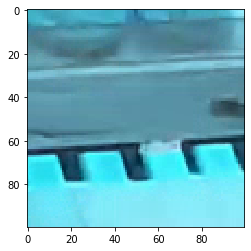

Номер класса: 0
Название класса: круассан


Номер класса: 1
Название класса: полки


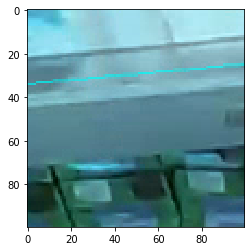

Номер класса: 1
Название класса: полки


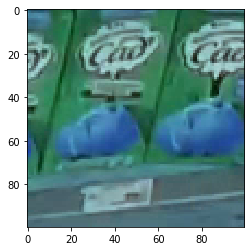

Номер класса: 1
Название класса: полки


Номер класса: 0
Название класса: круассан


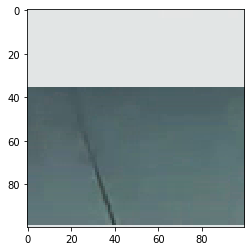

Номер класса: 0
Название класса: круассан


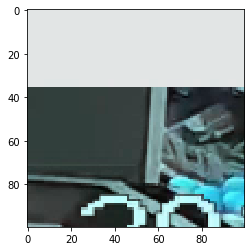

Номер класса: 1
Название класса: полки


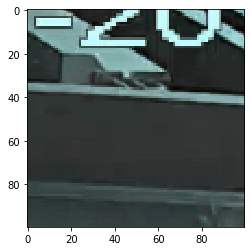

Номер класса: 0
Название класса: круассан


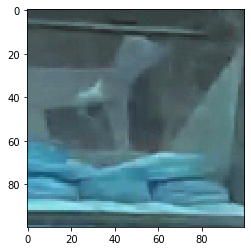

Номер класса: 1
Название класса: полки


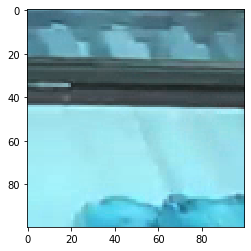

Номер класса: 1
Название класса: полки


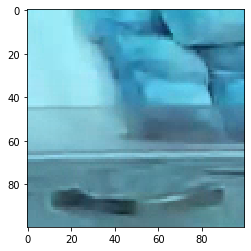

Номер класса: 0
Название класса: круассан


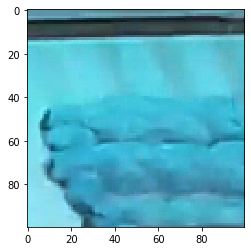

Номер класса: 1
Название класса: полки


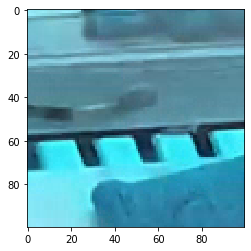

Номер класса: 1
Название класса: полки


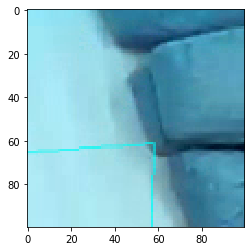

Номер класса: 1
Название класса: полки


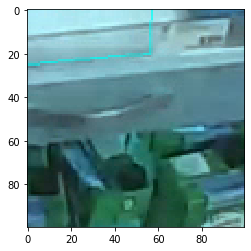

Номер класса: 1
Название класса: полки


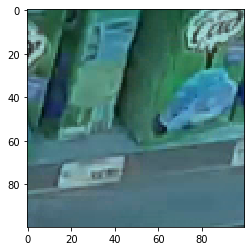

Номер класса: 0
Название класса: круассан


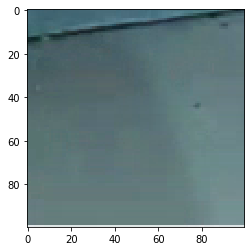

Номер класса: 0
Название класса: круассан


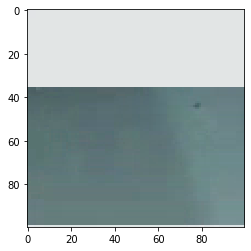

Номер класса: 1
Название класса: полки


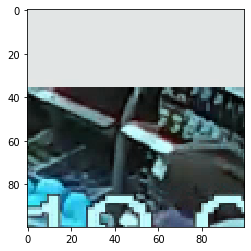

Номер класса: 1
Название класса: полки


Номер класса: 0
Название класса: круассан


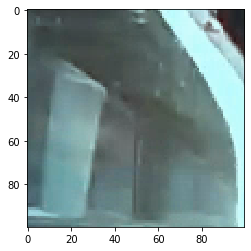

Номер класса: 1
Название класса: полки


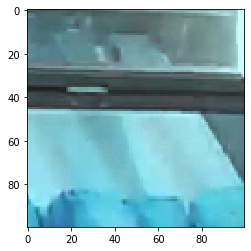

Номер класса: 1
Название класса: полки


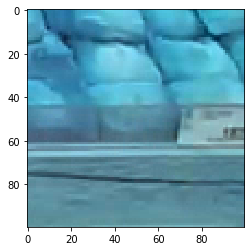

Номер класса: 1
Название класса: полки


Номер класса: 1
Название класса: полки


Номер класса: 0
Название класса: круассан


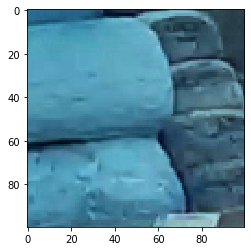

Номер класса: 1
Название класса: полки


Номер класса: 1
Название класса: полки


Номер класса: 1
Название класса: полки


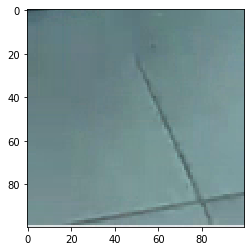

Номер класса: 1
Название класса: полки


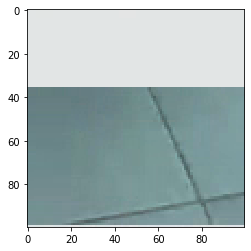

Номер класса: 1
Название класса: полки


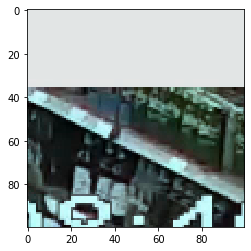

Номер класса: 1
Название класса: полки


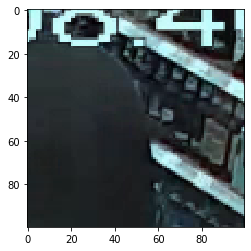

Номер класса: 1
Название класса: полки


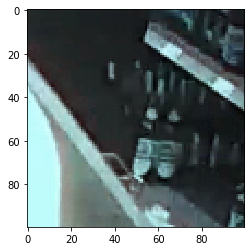

Номер класса: 1
Название класса: полки


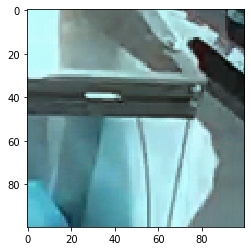

Номер класса: 1
Название класса: полки


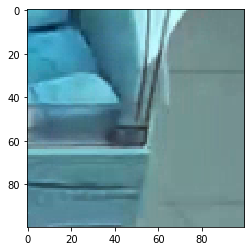

Номер класса: 1
Название класса: полки


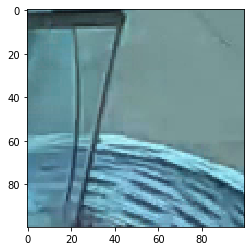

Номер класса: 0
Название класса: круассан


Номер класса: 1
Название класса: полки


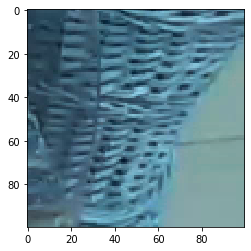

Номер класса: 1
Название класса: полки


Номер класса: 0
Название класса: круассан


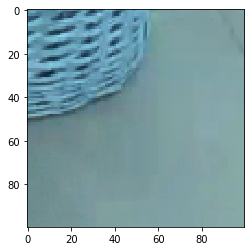

Номер класса: 1
Название класса: полки


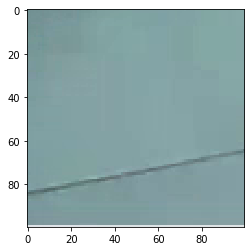

Номер класса: 1
Название класса: полки


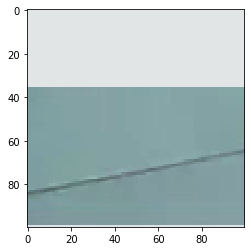

Номер класса: 1
Название класса: полки


Номер класса: 1
Название класса: полки


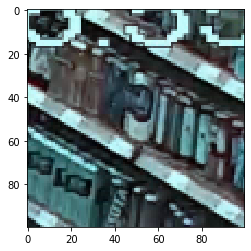

Номер класса: 1
Название класса: полки


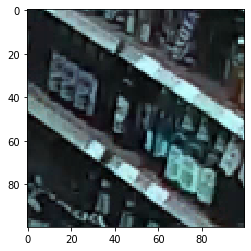

Номер класса: 1
Название класса: полки


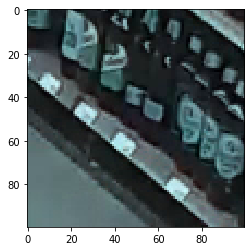

Номер класса: 1
Название класса: полки


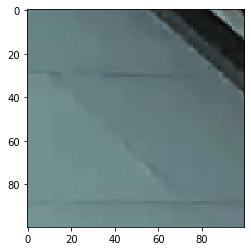

Номер класса: 0
Название класса: круассан


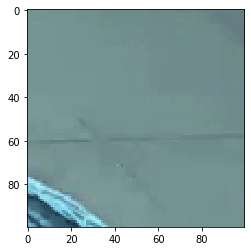

Номер класса: 0
Название класса: круассан


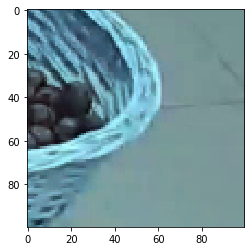

Номер класса: 1
Название класса: полки


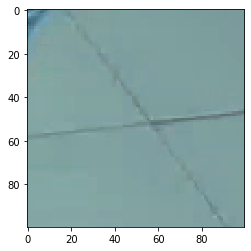

Номер класса: 0
Название класса: круассан


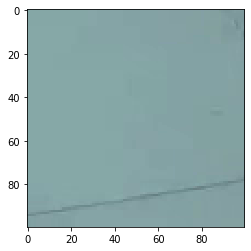

Номер класса: 1
Название класса: полки


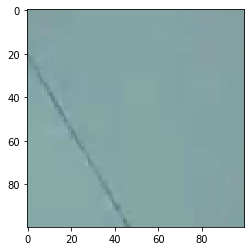

Номер класса: 1
Название класса: полки


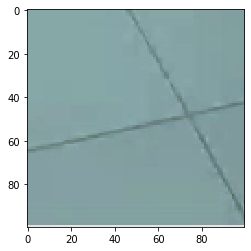

Номер класса: 1
Название класса: полки


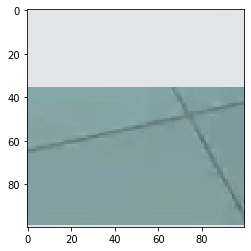

Номер класса: 1
Название класса: полки


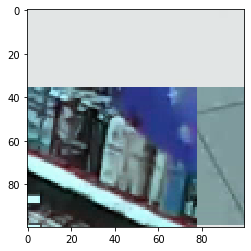

Номер класса: 1
Название класса: полки


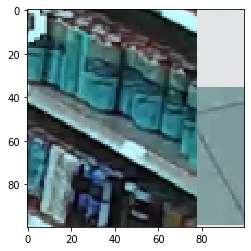

Номер класса: 1
Название класса: полки


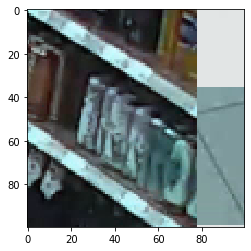

Номер класса: 1
Название класса: полки


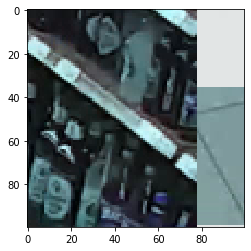

Номер класса: 1
Название класса: полки


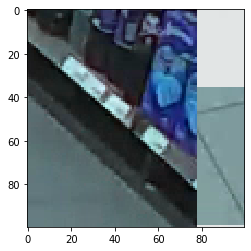

Номер класса: 0
Название класса: круассан


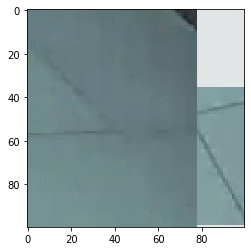

Номер класса: 0
Название класса: круассан


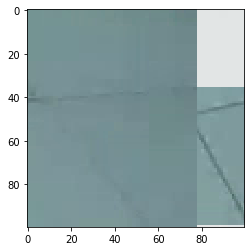

Номер класса: 1
Название класса: полки


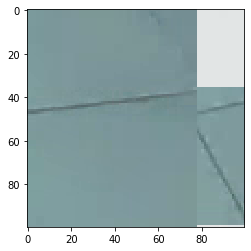

Номер класса: 1
Название класса: полки


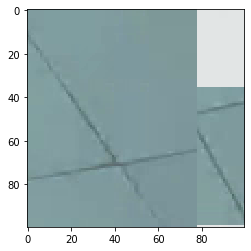

Номер класса: 1
Название класса: полки


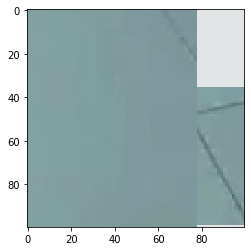

Номер класса: 1
Название класса: полки


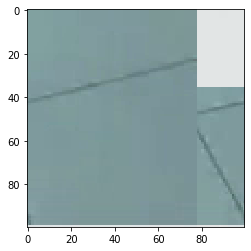

Номер класса: 1
Название класса: полки


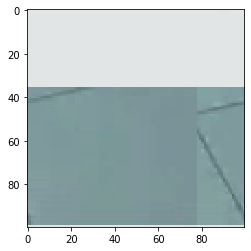

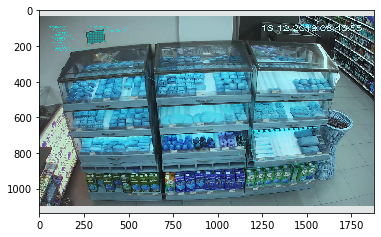

In [40]:
# целую картинку разбиваем по части по заданным координатам и проверяем
for x in range(len(listX)):
    for y in range(len(listY)):
        if listY[y]==listY[-1] or listX[x]==listX[-1]:
            break
        dy = listY[y+1]-listY[y]
        dx = listX[x+1]-listX[x]
        mask [:dy,:dx]= imgM[listY[y]:listY[y+1], listX[x]:listX[x+1]]
        #mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
        
        pic = image.img_to_array(mask)
        pic = np.expand_dims(pic, axis=0)
        pic /= 255
        prediction = model.predict(pic)
        prediction.shape
        prediction = np.argmax(prediction)
        if prediction == 0:
            pic[:,:,0] = pic[:,:,0]+100
        if prediction == 2:
            pic[:,:,1] = pic[:,:,1]+100
        if prediction == 3:
            pic[:,:,2] = pic[:,:,2]+100
        pic[pic>255] = 255
        print("Номер класса:", prediction)
        print("Название класса:", classes[prediction])
        plt.imshow(mask)
        plt.show()
plt.imshow(imgM)
plt.show()

(1136, 1878, 3)
50 50
50 60
50 70
50 80
50 90
50 100
50 110
50 120
50 130
50 140
50 150
50 160
50 170
50 180
50 190
50 200
50 210
50 220
50 230
50 240
50 250
50 260
50 270
50 280
50 290
50 300
50 310
50 320
50 330
50 340
50 350
50 360
50 370
50 380
50 390
50 400
50 410
50 420
50 430
50 440
50 450
50 460
50 470
50 480
50 490
50 500
50 510
50 520
50 530
50 540
50 550
50 560
50 570
50 580
50 590
50 600
50 610
50 620
50 630
50 640
50 650
50 660
50 670
50 680
50 690
50 700
50 710
50 720
50 730
50 740
50 750
50 760
50 770
50 780
50 790
50 800
50 810
50 820
50 830
50 840
50 850
50 860
50 870
50 880
50 890
50 900
50 910
50 920
50 930
50 940
50 950
50 960
50 970
50 980
50 990
50 1000
50 1010
50 1020
50 1030
50 1040
50 1050
50 1060
50 1070
50 1080
50 1090
50 1100
50 1110
50 1120
50 1130
50 1140
50 1150
50 1160
50 1170
50 1180
50 1190
50 1200
50 1210
50 1220
50 1230
50 1240
50 1250
50 1260
50 1270
50 1280
50 1290
50 1300
50 1310
50 1320
50 1330
50 1340
50 1350
50 1360
50 1370
50 1380
50 1390
50 1

110 130
110 140
110 150
110 160
110 170
110 180
110 190
110 200
110 210
110 220
110 230
110 240
110 250
110 260
110 270
110 280
110 290
110 300
110 310
110 320
110 330
110 340
110 350
110 360
110 370
110 380
110 390
110 400
110 410
110 420
110 430
110 440
110 450
110 460
110 470
110 480
110 490
110 500
110 510
110 520
110 530
110 540
110 550
110 560
110 570
110 580
110 590
110 600
110 610
110 620
110 630
110 640
110 650
110 660
110 670
110 680
110 690
110 700
110 710
110 720
110 730
110 740
110 750
110 760
110 770
110 780
110 790
110 800
110 810
110 820
110 830
110 840
110 850
110 860
110 870
110 880
110 890
110 900
110 910
110 920
110 930
110 940
110 950
110 960
110 970
110 980
110 990
110 1000
110 1010
110 1020
110 1030
110 1040
110 1050
110 1060
110 1070
110 1080
110 1090
110 1100
110 1110
110 1120
110 1130
110 1140
110 1150
110 1160
110 1170
110 1180
110 1190
110 1200
110 1210
110 1220
110 1230
110 1240
110 1250
110 1260
110 1270
110 1280
110 1290
110 1300
110 1310
110 1320
110 133

160 990
160 1000
160 1010
160 1020
160 1030
160 1040
160 1050
160 1060
160 1070
160 1080
160 1090
160 1100
160 1110
160 1120
160 1130
160 1140
160 1150
160 1160
160 1170
160 1180
160 1190
160 1200
160 1210
160 1220
160 1230
160 1240
160 1250
160 1260
160 1270
160 1280
160 1290
160 1300
160 1310
160 1320
160 1330
160 1340
160 1350
160 1360
160 1370
160 1380
160 1390
160 1400
160 1410
160 1420
160 1430
160 1440
160 1450
160 1460
160 1470
160 1480
160 1490
160 1500
160 1510
160 1520
160 1530
160 1540
160 1550
160 1560
160 1570
160 1580
160 1590
160 1600
160 1610
160 1620
160 1630
160 1640
160 1650
160 1660
160 1670
160 1680
160 1690
160 1700
160 1710
160 1720
160 1730
160 1740
160 1750
160 1760
160 1770
160 1780
160 1790
160 1800
160 1810
160 1820
170 50
170 60
170 70
170 80
170 90
170 100
170 110
170 120
170 130
170 140
170 150
170 160
170 170
170 180
170 190
170 200
170 210
170 220
170 230
170 240
170 250
170 260
170 270
170 280
170 290
170 300
170 310
170 320
170 330
170 340
170 350
17

210 1750
210 1760
210 1770
210 1780
210 1790
210 1800
210 1810
210 1820
220 50
220 60
220 70
220 80
220 90
220 100
220 110
220 120
220 130
220 140
220 150
220 160
220 170
220 180
220 190
220 200
220 210
220 220
220 230
220 240
220 250
220 260
220 270
220 280
220 290
220 300
220 310
220 320
220 330
220 340
220 350
220 360
220 370
220 380
220 390
220 400
220 410
220 420
220 430
220 440
220 450
220 460
220 470
220 480
220 490
220 500
220 510
220 520
220 530
220 540
220 550
220 560
220 570
220 580
220 590
220 600
220 610
220 620
220 630
220 640
220 650
220 660
220 670
220 680
220 690
220 700
220 710
220 720
220 730
220 740
220 750
220 760
220 770
220 780
220 790
220 800
220 810
220 820
220 830
220 840
220 850
220 860
220 870
220 880
220 890
220 900
220 910
220 920
220 930
220 940
220 950
220 960
220 970
220 980
220 990
220 1000
220 1010
220 1020
220 1030
220 1040
220 1050
220 1060
220 1070
220 1080
220 1090
220 1100
220 1110
220 1120
220 1130
220 1140
220 1150
220 1160
220 1170
220 1180
22

270 830
270 840
270 850
270 860
270 870
270 880
270 890
270 900
270 910
270 920
270 930
270 940
270 950
270 960
270 970
270 980
270 990
270 1000
270 1010
270 1020
270 1030
270 1040
270 1050
270 1060
270 1070
270 1080
270 1090
270 1100
270 1110
270 1120
270 1130
270 1140
270 1150
270 1160
270 1170
270 1180
270 1190
270 1200
270 1210
270 1220
270 1230
270 1240
270 1250
270 1260
270 1270
270 1280
270 1290
270 1300
270 1310
270 1320
270 1330
270 1340
270 1350
270 1360
270 1370
270 1380
270 1390
270 1400
270 1410
270 1420
270 1430
270 1440
270 1450
270 1460
270 1470
270 1480
270 1490
270 1500
270 1510
270 1520
270 1530
270 1540
270 1550
270 1560
270 1570
270 1580
270 1590
270 1600
270 1610
270 1620
270 1630
270 1640
270 1650
270 1660
270 1670
270 1680
270 1690
270 1700
270 1710
270 1720
270 1730
270 1740
270 1750
270 1760
270 1770
270 1780
270 1790
270 1800
270 1810
270 1820
280 50
280 60
280 70
280 80
280 90
280 100
280 110
280 120
280 130
280 140
280 150
280 160
280 170
280 180
280 190
28

320 1610
320 1620
320 1630
320 1640
320 1650
320 1660
320 1670
320 1680
320 1690
320 1700
320 1710
320 1720
320 1730
320 1740
320 1750
320 1760
320 1770
320 1780
320 1790
320 1800
320 1810
320 1820
330 50
330 60
330 70
330 80
330 90
330 100
330 110
330 120
330 130
330 140
330 150
330 160
330 170
330 180
330 190
330 200
330 210
330 220
330 230
330 240
330 250
330 260
330 270
330 280
330 290
330 300
330 310
330 320
330 330
330 340
330 350
330 360
330 370
330 380
330 390
330 400
330 410
330 420
330 430
330 440
330 450
330 460
330 470
330 480
330 490
330 500
330 510
330 520
330 530
330 540
330 550
330 560
330 570
330 580
330 590
330 600
330 610
330 620
330 630
330 640
330 650
330 660
330 670
330 680
330 690
330 700
330 710
330 720
330 730
330 740
330 750
330 760
330 770
330 780
330 790
330 800
330 810
330 820
330 830
330 840
330 850
330 860
330 870
330 880
330 890
330 900
330 910
330 920
330 930
330 940
330 950
330 960
330 970
330 980
330 990
330 1000
330 1010
330 1020
330 1030
330 1040
33

380 680
380 690
380 700
380 710
380 720
380 730
380 740
380 750
380 760
380 770
380 780
380 790
380 800
380 810
380 820
380 830
380 840
380 850
380 860
380 870
380 880
380 890
380 900
380 910
380 920
380 930
380 940
380 950
380 960
380 970
380 980
380 990
380 1000
380 1010
380 1020
380 1030
380 1040
380 1050
380 1060
380 1070
380 1080
380 1090
380 1100
380 1110
380 1120
380 1130
380 1140
380 1150
380 1160
380 1170
380 1180
380 1190
380 1200
380 1210
380 1220
380 1230
380 1240
380 1250
380 1260
380 1270
380 1280
380 1290
380 1300
380 1310
380 1320
380 1330
380 1340
380 1350
380 1360
380 1370
380 1380
380 1390
380 1400
380 1410
380 1420
380 1430
380 1440
380 1450
380 1460
380 1470
380 1480
380 1490
380 1500
380 1510
380 1520
380 1530
380 1540
380 1550
380 1560
380 1570
380 1580
380 1590
380 1600
380 1610
380 1620
380 1630
380 1640
380 1650
380 1660
380 1670
380 1680
380 1690
380 1700
380 1710
380 1720
380 1730
380 1740
380 1750
380 1760
380 1770
380 1780
380 1790
380 1800
380 1810
380 18

430 1480
430 1490
430 1500
430 1510
430 1520
430 1530
430 1540
430 1550
430 1560
430 1570
430 1580
430 1590
430 1600
430 1610
430 1620
430 1630
430 1640
430 1650
430 1660
430 1670
430 1680
430 1690
430 1700
430 1710
430 1720
430 1730
430 1740
430 1750
430 1760
430 1770
430 1780
430 1790
430 1800
430 1810
430 1820
440 50
440 60
440 70
440 80
440 90
440 100
440 110
440 120
440 130
440 140
440 150
440 160
440 170
440 180
440 190
440 200
440 210
440 220
440 230
440 240
440 250
440 260
440 270
440 280
440 290
440 300
440 310
440 320
440 330
440 340
440 350
440 360
440 370
440 380
440 390
440 400
440 410
440 420
440 430
440 440
440 450
440 460
440 470
440 480
440 490
440 500
440 510
440 520
440 530
440 540
440 550
440 560
440 570
440 580
440 590
440 600
440 610
440 620
440 630
440 640
440 650
440 660
440 670
440 680
440 690
440 700
440 710
440 720
440 730
440 740
440 750
440 760
440 770
440 780
440 790
440 800
440 810
440 820
440 830
440 840
440 850
440 860
440 870
440 880
440 890
440 900
44

490 520
490 530
490 540
490 550
490 560
490 570
490 580
490 590
490 600
490 610
490 620
490 630
490 640
490 650
490 660
490 670
490 680
490 690
490 700
490 710
490 720
490 730
490 740
490 750
490 760
490 770
490 780
490 790
490 800
490 810
490 820
490 830
490 840
490 850
490 860
490 870
490 880
490 890
490 900
490 910
490 920
490 930
490 940
490 950
490 960
490 970
490 980
490 990
490 1000
490 1010
490 1020
490 1030
490 1040
490 1050
490 1060
490 1070
490 1080
490 1090
490 1100
490 1110
490 1120
490 1130
490 1140
490 1150
490 1160
490 1170
490 1180
490 1190
490 1200
490 1210
490 1220
490 1230
490 1240
490 1250
490 1260
490 1270
490 1280
490 1290
490 1300
490 1310
490 1320
490 1330
490 1340
490 1350
490 1360
490 1370
490 1380
490 1390
490 1400
490 1410
490 1420
490 1430
490 1440
490 1450
490 1460
490 1470
490 1480
490 1490
490 1500
490 1510
490 1520
490 1530
490 1540
490 1550
490 1560
490 1570
490 1580
490 1590
490 1600
490 1610
490 1620
490 1630
490 1640
490 1650
490 1660
490 1670
490 

540 1350
540 1360
540 1370
540 1380
540 1390
540 1400
540 1410
540 1420
540 1430
540 1440
540 1450
540 1460
540 1470
540 1480
540 1490
540 1500
540 1510
540 1520
540 1530
540 1540
540 1550
540 1560
540 1570
540 1580
540 1590
540 1600
540 1610
540 1620
540 1630
540 1640
540 1650
540 1660
540 1670
540 1680
540 1690
540 1700
540 1710
540 1720
540 1730
540 1740
540 1750
540 1760
540 1770
540 1780
540 1790
540 1800
540 1810
540 1820
550 50
550 60
550 70
550 80
550 90
550 100
550 110
550 120
550 130
550 140
550 150
550 160
550 170
550 180
550 190
550 200
550 210
550 220
550 230
550 240
550 250
550 260
550 270
550 280
550 290
550 300
550 310
550 320
550 330
550 340
550 350
550 360
550 370
550 380
550 390
550 400
550 410
550 420
550 430
550 440
550 450
550 460
550 470
550 480
550 490
550 500
550 510
550 520
550 530
550 540
550 550
550 560
550 570
550 580
550 590
550 600
550 610
550 620
550 630
550 640
550 650
550 660
550 670
550 680
550 690
550 700
550 710
550 720
550 730
550 740
550 750
550 7

600 380
600 390
600 400
600 410
600 420
600 430
600 440
600 450
600 460
600 470
600 480
600 490
600 500
600 510
600 520
600 530
600 540
600 550
600 560
600 570
600 580
600 590
600 600
600 610
600 620
600 630
600 640
600 650
600 660
600 670
600 680
600 690
600 700
600 710
600 720
600 730
600 740
600 750
600 760
600 770
600 780
600 790
600 800
600 810
600 820
600 830
600 840
600 850
600 860
600 870
600 880
600 890
600 900
600 910
600 920
600 930
600 940
600 950
600 960
600 970
600 980
600 990
600 1000
600 1010
600 1020
600 1030
600 1040
600 1050
600 1060
600 1070
600 1080
600 1090
600 1100
600 1110
600 1120
600 1130
600 1140
600 1150
600 1160
600 1170
600 1180
600 1190
600 1200
600 1210
600 1220
600 1230
600 1240
600 1250
600 1260
600 1270
600 1280
600 1290
600 1300
600 1310
600 1320
600 1330
600 1340
600 1350
600 1360
600 1370
600 1380
600 1390
600 1400
600 1410
600 1420
600 1430
600 1440
600 1450
600 1460
600 1470
600 1480
600 1490
600 1500
600 1510
600 1520
600 1530
600 1540
600 1550


650 1210
650 1220
650 1230
650 1240
650 1250
650 1260
650 1270
650 1280
650 1290
650 1300
650 1310
650 1320
650 1330
650 1340
650 1350
650 1360
650 1370
650 1380
650 1390
650 1400
650 1410
650 1420
650 1430
650 1440
650 1450
650 1460
650 1470
650 1480
650 1490
650 1500
650 1510
650 1520
650 1530
650 1540
650 1550
650 1560
650 1570
650 1580
650 1590
650 1600
650 1610
650 1620
650 1630
650 1640
650 1650
650 1660
650 1670
650 1680
650 1690
650 1700
650 1710
650 1720
650 1730
650 1740
650 1750
650 1760
650 1770
650 1780
650 1790
650 1800
650 1810
650 1820
660 50
660 60
660 70
660 80
660 90
660 100
660 110
660 120
660 130
660 140
660 150
660 160
660 170
660 180
660 190
660 200
660 210
660 220
660 230
660 240
660 250
660 260
660 270
660 280
660 290
660 300
660 310
660 320
660 330
660 340
660 350
660 360
660 370
660 380
660 390
660 400
660 410
660 420
660 430
660 440
660 450
660 460
660 470
660 480
660 490
660 500
660 510
660 520
660 530
660 540
660 550
660 560
660 570
660 580
660 590
660 600

710 230
710 240
710 250
710 260
710 270
710 280
710 290
710 300
710 310
710 320
710 330
710 340
710 350
710 360
710 370
710 380
710 390
710 400
710 410
710 420
710 430
710 440
710 450
710 460
710 470
710 480
710 490
710 500
710 510
710 520
710 530
710 540
710 550
710 560
710 570
710 580
710 590
710 600
710 610
710 620
710 630
710 640
710 650
710 660
710 670
710 680
710 690
710 700
710 710
710 720
710 730
710 740
710 750
710 760
710 770
710 780
710 790
710 800
710 810
710 820
710 830
710 840
710 850
710 860
710 870
710 880
710 890
710 900
710 910
710 920
710 930
710 940
710 950
710 960
710 970
710 980
710 990
710 1000
710 1010
710 1020
710 1030
710 1040
710 1050
710 1060
710 1070
710 1080
710 1090
710 1100
710 1110
710 1120
710 1130
710 1140
710 1150
710 1160
710 1170
710 1180
710 1190
710 1200
710 1210
710 1220
710 1230
710 1240
710 1250
710 1260
710 1270
710 1280
710 1290
710 1300
710 1310
710 1320
710 1330
710 1340
710 1350
710 1360
710 1370
710 1380
710 1390
710 1400
710 1410
710 14

760 1080
760 1090
760 1100
760 1110
760 1120
760 1130
760 1140
760 1150
760 1160
760 1170
760 1180
760 1190
760 1200
760 1210
760 1220
760 1230
760 1240
760 1250
760 1260
760 1270
760 1280
760 1290
760 1300
760 1310
760 1320
760 1330
760 1340
760 1350
760 1360
760 1370
760 1380
760 1390
760 1400
760 1410
760 1420
760 1430
760 1440
760 1450
760 1460
760 1470
760 1480
760 1490
760 1500
760 1510
760 1520
760 1530
760 1540
760 1550
760 1560
760 1570
760 1580
760 1590
760 1600
760 1610
760 1620
760 1630
760 1640
760 1650
760 1660
760 1670
760 1680
760 1690
760 1700
760 1710
760 1720
760 1730
760 1740
760 1750
760 1760
760 1770
760 1780
760 1790
760 1800
760 1810
760 1820
770 50
770 60
770 70
770 80
770 90
770 100
770 110
770 120
770 130
770 140
770 150
770 160
770 170
770 180
770 190
770 200
770 210
770 220
770 230
770 240
770 250
770 260
770 270
770 280
770 290
770 300
770 310
770 320
770 330
770 340
770 350
770 360
770 370
770 380
770 390
770 400
770 410
770 420
770 430
770 440
770 450
77

820 80
820 90
820 100
820 110
820 120
820 130
820 140
820 150
820 160
820 170
820 180
820 190
820 200
820 210
820 220
820 230
820 240
820 250
820 260
820 270
820 280
820 290
820 300
820 310
820 320
820 330
820 340
820 350
820 360
820 370
820 380
820 390
820 400
820 410
820 420
820 430
820 440
820 450
820 460
820 470
820 480
820 490
820 500
820 510
820 520
820 530
820 540
820 550
820 560
820 570
820 580
820 590
820 600
820 610
820 620
820 630
820 640
820 650
820 660
820 670
820 680
820 690
820 700
820 710
820 720
820 730
820 740
820 750
820 760
820 770
820 780
820 790
820 800
820 810
820 820
820 830
820 840
820 850
820 860
820 870
820 880
820 890
820 900
820 910
820 920
820 930
820 940
820 950
820 960
820 970
820 980
820 990
820 1000
820 1010
820 1020
820 1030
820 1040
820 1050
820 1060
820 1070
820 1080
820 1090
820 1100
820 1110
820 1120
820 1130
820 1140
820 1150
820 1160
820 1170
820 1180
820 1190
820 1200
820 1210
820 1220
820 1230
820 1240
820 1250
820 1260
820 1270
820 1280
820 1

870 950
870 960
870 970
870 980
870 990
870 1000
870 1010
870 1020
870 1030
870 1040
870 1050
870 1060
870 1070
870 1080
870 1090
870 1100
870 1110
870 1120
870 1130
870 1140
870 1150
870 1160
870 1170
870 1180
870 1190
870 1200
870 1210
870 1220
870 1230
870 1240
870 1250
870 1260
870 1270
870 1280
870 1290
870 1300
870 1310
870 1320
870 1330
870 1340
870 1350
870 1360
870 1370
870 1380
870 1390
870 1400
870 1410
870 1420
870 1430
870 1440
870 1450
870 1460
870 1470
870 1480
870 1490
870 1500
870 1510
870 1520
870 1530
870 1540
870 1550
870 1560
870 1570
870 1580
870 1590
870 1600
870 1610
870 1620
870 1630
870 1640
870 1650
870 1660
870 1670
870 1680
870 1690
870 1700
870 1710
870 1720
870 1730
870 1740
870 1750
870 1760
870 1770
870 1780
870 1790
870 1800
870 1810
870 1820
880 50
880 60
880 70
880 80
880 90
880 100
880 110
880 120
880 130
880 140
880 150
880 160
880 170
880 180
880 190
880 200
880 210
880 220
880 230
880 240
880 250
880 260
880 270
880 280
880 290
880 300
880 310
88

920 1730
920 1740
920 1750
920 1760
920 1770
920 1780
920 1790
920 1800
920 1810
920 1820
930 50
930 60
930 70
930 80
930 90
930 100
930 110
930 120
930 130
930 140
930 150
930 160
930 170
930 180
930 190
930 200
930 210
930 220
930 230
930 240
930 250
930 260
930 270
930 280
930 290
930 300
930 310
930 320
930 330
930 340
930 350
930 360
930 370
930 380
930 390
930 400
930 410
930 420
930 430
930 440
930 450
930 460
930 470
930 480
930 490
930 500
930 510
930 520
930 530
930 540
930 550
930 560
930 570
930 580
930 590
930 600
930 610
930 620
930 630
930 640
930 650
930 660
930 670
930 680
930 690
930 700
930 710
930 720
930 730
930 740
930 750
930 760
930 770
930 780
930 790
930 800
930 810
930 820
930 830
930 840
930 850
930 860
930 870
930 880
930 890
930 900
930 910
930 920
930 930
930 940
930 950
930 960
930 970
930 980
930 990
930 1000
930 1010
930 1020
930 1030
930 1040
930 1050
930 1060
930 1070
930 1080
930 1090
930 1100
930 1110
930 1120
930 1130
930 1140
930 1150
930 1160
93

980 810
980 820
980 830
980 840
980 850
980 860
980 870
980 880
980 890
980 900
980 910
980 920
980 930
980 940
980 950
980 960
980 970
980 980
980 990
980 1000
980 1010
980 1020
980 1030
980 1040
980 1050
980 1060
980 1070
980 1080
980 1090
980 1100
980 1110
980 1120
980 1130
980 1140
980 1150
980 1160
980 1170
980 1180
980 1190
980 1200
980 1210
980 1220
980 1230
980 1240
980 1250
980 1260
980 1270
980 1280
980 1290
980 1300
980 1310
980 1320
980 1330
980 1340
980 1350
980 1360
980 1370
980 1380
980 1390
980 1400
980 1410
980 1420
980 1430
980 1440
980 1450
980 1460
980 1470
980 1480
980 1490
980 1500
980 1510
980 1520
980 1530
980 1540
980 1550
980 1560
980 1570
980 1580
980 1590
980 1600
980 1610
980 1620
980 1630
980 1640
980 1650
980 1660
980 1670
980 1680
980 1690
980 1700
980 1710
980 1720
980 1730
980 1740
980 1750
980 1760
980 1770
980 1780
980 1790
980 1800
980 1810
980 1820
990 50
990 60
990 70
990 80
990 90
990 100
990 110
990 120
990 130
990 140
990 150
990 160
990 170
99

1030 910
1030 920
1030 930
1030 940
1030 950
1030 960
1030 970
1030 980
1030 990
1030 1000
1030 1010
1030 1020
1030 1030
1030 1040
1030 1050
1030 1060
1030 1070
1030 1080
1030 1090
1030 1100
1030 1110
1030 1120
1030 1130
1030 1140
1030 1150
1030 1160
1030 1170
1030 1180
1030 1190
1030 1200
1030 1210
1030 1220
1030 1230
1030 1240
1030 1250
1030 1260
1030 1270
1030 1280
1030 1290
1030 1300
1030 1310
1030 1320
1030 1330
1030 1340
1030 1350
1030 1360
1030 1370
1030 1380
1030 1390
1030 1400
1030 1410
1030 1420
1030 1430
1030 1440
1030 1450
1030 1460
1030 1470
1030 1480
1030 1490
1030 1500
1030 1510
1030 1520
1030 1530
1030 1540
1030 1550
1030 1560
1030 1570
1030 1580
1030 1590
1030 1600
1030 1610
1030 1620
1030 1630
1030 1640
1030 1650
1030 1660
1030 1670
1030 1680
1030 1690
1030 1700
1030 1710
1030 1720
1030 1730
1030 1740
1030 1750
1030 1760
1030 1770
1030 1780
1030 1790
1030 1800
1030 1810
1030 1820
1040 50
1040 60
1040 70
1040 80
1040 90
1040 100
1040 110
1040 120
1040 130
1040 140
1040

1080 680
1080 690
1080 700
1080 710
1080 720
1080 730
1080 740
1080 750
1080 760
1080 770
1080 780
1080 790
1080 800
1080 810
1080 820
1080 830
1080 840
1080 850
1080 860
1080 870
1080 880
1080 890
1080 900
1080 910
1080 920
1080 930
1080 940
1080 950
1080 960
1080 970
1080 980
1080 990
1080 1000
1080 1010
1080 1020
1080 1030
1080 1040
1080 1050
1080 1060
1080 1070
1080 1080
1080 1090
1080 1100
1080 1110
1080 1120
1080 1130
1080 1140
1080 1150
1080 1160
1080 1170
1080 1180
1080 1190
1080 1200
1080 1210
1080 1220
1080 1230
1080 1240
1080 1250
1080 1260
1080 1270
1080 1280
1080 1290
1080 1300
1080 1310
1080 1320
1080 1330
1080 1340
1080 1350
1080 1360
1080 1370
1080 1380
1080 1390
1080 1400
1080 1410
1080 1420
1080 1430
1080 1440
1080 1450
1080 1460
1080 1470
1080 1480
1080 1490
1080 1500
1080 1510
1080 1520
1080 1530
1080 1540
1080 1550
1080 1560
1080 1570
1080 1580
1080 1590
1080 1600
1080 1610
1080 1620
1080 1630
1080 1640
1080 1650
1080 1660
1080 1670
1080 1680
1080 1690
1080 1700
10

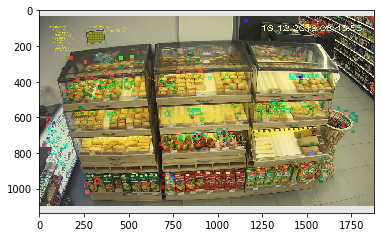

In [87]:
imgM = cv2.imread('./pictest/Screenshot from magnitPonchik.png')
imgM = cv2.cvtColor(imgM, cv2.COLOR_BGR2RGB)
#imgM = image.load_img('./pictest/Screenshot from magnitPonchik.png')
print(imgM.shape)
step = 10
for y in range(int(img_height/2), int(imgM.shape[0]-img_height/2),step):
    for x in range(int(img_width/2), int(imgM.shape[1]-img_width/2),step):
        xS = int(x - img_width/2)
        yS = int(y - img_height/2)
        xSn = int(xS+img_width)
        ySn = int(yS+img_height)
        imgSmall = imgM[yS:ySn, xS:xSn]
        imgSmall = image.img_to_array(imgSmall)
        imgSmall = np.expand_dims(imgSmall, axis=0)
        #imgSmall /= 255
        prediction = model.predict(imgSmall)

        # из библиотеки numpy используем функцию argmax для отображения максимального значения
        prediction = np.argmax(prediction)
        if prediction == 0:#cruassan
            c = imgM[(y-step) : (y+step), (x-step) : (x+step),0]+150
            c[c > 255] = 255
            imgM[(y-step) : (y+step), (x-step) : (x+step),0] = c
        if prediction == 2:#ponchik
            c = imgM[(y-step) : (y+step), (x-step) : (x+step),1]+150
            c[c > 255] = 255
            imgM[(y-step) : (y+step), (x-step) : (x+step),1] = c
        if prediction == 3:#zavitok
            c = imgM[(y-step) : (y+step), (x-step) : (x+step),2]+150
            c[c > 255] = 255
            imgM[(y-step) : (y+step), (x-step) : (x+step),2] = c

plt.imshow(imgM)
plt.show()

In [88]:
#imgM = cv2.cvtColor(imgM, cv2.COLOR_BGR2RGB)
#cv2.imwrite('got.png', imgM)

True